In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Skills Migration

Todas las métricas de migración de talentos se basan en la migración neta (llegadas menos salidas). Linkedin normaliza estas cifras de migración neta de miembros en un país determinado para permitir comparaciones más justas entre las muestras. Por ejemplo, considerando a Canadá como el país de interés,los flujos netos de migrantes hacia / desde los Estados Unidos en términos absolutos se normalizan por el recuento total de miembros de Linkedin en Canadá. Se utiliza un método similar para el cálculo de las ganancias/pérdidas de habilidades e industria asociadas con los flujos migratorios bilaterales. 
Dado que los datos de Linkedin tienen una mejor cobertura de los trabajadores administrativos en los sectores de servicios intensivos en conocimientos, es poco probable que estos flujos migratorios sean representativos de la totalidad el panorama migratorio de un país, pero puede arrojar luz sobre algunos de los sectores más dinámicos e innovadores.

Migración de habilidades: habilidades adquiridas y perdidas. Basado en las habilidades asociadas al perfil de un miembro al momento de la migración. La ganancia o pérdida neta de miembros de otro país con una habilidad determinada dividida por la cantidad de miembros de LinkedIn con esa habilidad en el país de destino (o seleccionado), multiplicado por 10,000.

In [61]:
#Leo el dataset
df_skill_mig = pd.read_csv('/Users/gaston/Downloads/skill_migration_public.csv', delimiter=',')
df_skill_mig.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_skill_mig = df_skill_mig.iloc[:, :12]
df_skill_mig

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64
...,...,...,...,...,...,...,...,...,...,...,...,...
20642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Defino un dataframe solo con Argentina
df_skill_mig_ar = df_skill_mig.loc[df_skill_mig['country_name']=='Argentina']
df_skill_mig_ar = df_skill_mig_ar.reset_index(drop=True)
df_skill_mig_ar

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ar,Argentina,High income,Latin America & Caribbean,2626.0,Specialized Industry Skills,Sociology,-38.90,-126.02,-62.94,-71.28,-327.67
1,ar,Argentina,High income,Latin America & Caribbean,1885.0,Business Skills,Affiliate Marketing,-134.97,-28.22,30.55,-83.54,-323.41
2,ar,Argentina,High income,Latin America & Caribbean,599.0,Business Skills,Sales Leads,-247.56,-157.47,-18.57,-117.29,-248.57
3,ar,Argentina,High income,Latin America & Caribbean,2548.0,Specialized Industry Skills,Industrial Design,-84.95,-73.58,-32.87,-45.90,-245.16
4,ar,Argentina,High income,Latin America & Caribbean,2776.0,Business Skills,Revenue Analysis,-87.48,-142.38,-115.12,-92.47,-233.48
...,...,...,...,...,...,...,...,...,...,...,...,...
166,ar,Argentina,High income,Latin America & Caribbean,25743.0,Specialized Industry Skills,Electronic Control Systems,-53.34,64.95,154.56,222.89,23.41
167,ar,Argentina,High income,Latin America & Caribbean,1838.0,Specialized Industry Skills,Utilities,-14.84,95.97,154.89,309.55,24.51
168,ar,Argentina,High income,Latin America & Caribbean,1150.0,Specialized Industry Skills,Instrumentation,12.14,90.17,136.43,337.52,28.18
169,ar,Argentina,High income,Latin America & Caribbean,11305.0,Specialized Industry Skills,Oil & Gas,8.50,112.19,173.10,417.52,87.37


In [64]:
df_skill_mig_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_code          171 non-null    object 
 1   country_name          171 non-null    object 
 2   wb_income             171 non-null    object 
 3   wb_region             171 non-null    object 
 4   skill_group_id        171 non-null    float64
 5   skill_group_category  171 non-null    object 
 6   skill_group_name      171 non-null    object 
 7   net_per_10K_2015      171 non-null    float64
 8   net_per_10K_2016      171 non-null    float64
 9   net_per_10K_2017      171 non-null    float64
 10  net_per_10K_2018      171 non-null    float64
 11  net_per_10K_2019      171 non-null    float64
dtypes: float64(6), object(6)
memory usage: 16.2+ KB


Observamos que no tenemos datos nulos

In [65]:
#idenfifico los nulos
nan_values = df_skill_mig_ar.isna()

#Cuento los NaN en cada columna.
nan_count = nan_values.sum()

# Cuento el total de nan para todo el df
total_nan_count = nan_count.sum()

print("Cantidad de valores NaN por columna:")
print(nan_count)

print("\nCantidad total de valores NaN en el DataFrame:", total_nan_count)


Cantidad de valores NaN por columna:
country_code            0
country_name            0
wb_income               0
wb_region               0
skill_group_id          0
skill_group_category    0
skill_group_name        0
net_per_10K_2015        0
net_per_10K_2016        0
net_per_10K_2017        0
net_per_10K_2018        0
net_per_10K_2019        0
dtype: int64

Cantidad total de valores NaN en el DataFrame: 0


In [66]:
df_skill_mig_ar.describe()

,skill_group_id,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,6892.608187,-45.881696,-23.816082,23.737778,38.850058,-99.243509
std,11611.536945,46.727397,56.897598,58.964087,98.041200,64.196213
min,44.000000,-294.480000,-203.840000,-115.120000,-117.290000,-327.670000
25%,634.500000,-65.895000,-51.370000,-9.120000,-17.380000,-130.140000
50%,2091.000000,-43.170000,-26.920000,14.540000,17.920000,-91.250000
75%,6414.000000,-23.700000,5.430000,47.910000,63.105000,-58.885000
max,50370.000000,96.060000,191.540000,321.820000,607.120000,108.720000


In [67]:
# Creo un diccionario para mapear los nombres de las columnas originales a los nombres simplificados (solo el año).
column_name_mapping = {}
for column in df_skill_mig_ar.columns:
    if 'net_per_10K_' in column:
        year = column.split('_')[-1]
        column_name_mapping[column] = year

# Renombo las columnas usando el diccionario de mapeo.
df_skill_mig_ar = df_skill_mig_ar.rename(columns=column_name_mapping)

# Ahora, las columnas tendrán solo el año como nombre.
# Por ejemplo, "net_per_10K_2015" se convertirá en "2015".

df_skill_mig_ar


,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,2015,2016,2017,2018,2019
0,ar,Argentina,High income,Latin America & Caribbean,2626.0,Specialized Industry Skills,Sociology,-38.90,-126.02,-62.94,-71.28,-327.67
1,ar,Argentina,High income,Latin America & Caribbean,1885.0,Business Skills,Affiliate Marketing,-134.97,-28.22,30.55,-83.54,-323.41
2,ar,Argentina,High income,Latin America & Caribbean,599.0,Business Skills,Sales Leads,-247.56,-157.47,-18.57,-117.29,-248.57
3,ar,Argentina,High income,Latin America & Caribbean,2548.0,Specialized Industry Skills,Industrial Design,-84.95,-73.58,-32.87,-45.90,-245.16
4,ar,Argentina,High income,Latin America & Caribbean,2776.0,Business Skills,Revenue Analysis,-87.48,-142.38,-115.12,-92.47,-233.48
...,...,...,...,...,...,...,...,...,...,...,...,...
166,ar,Argentina,High income,Latin America & Caribbean,25743.0,Specialized Industry Skills,Electronic Control Systems,-53.34,64.95,154.56,222.89,23.41
167,ar,Argentina,High income,Latin America & Caribbean,1838.0,Specialized Industry Skills,Utilities,-14.84,95.97,154.89,309.55,24.51
168,ar,Argentina,High income,Latin America & Caribbean,1150.0,Specialized Industry Skills,Instrumentation,12.14,90.17,136.43,337.52,28.18
169,ar,Argentina,High income,Latin America & Caribbean,11305.0,Specialized Industry Skills,Oil & Gas,8.50,112.19,173.10,417.52,87.37


In [68]:
# Convierto la columna 'skill_group_id' a cadena (string) para poder quitarle el .0 a los registros ya que lo tomó como número
df_skill_mig_ar['skill_group_id'] = df_skill_mig_ar['skill_group_id'].astype(str)
df_skill_mig_ar['skill_group_id'] = df_skill_mig_ar['skill_group_id'].str.replace('.0', '')
df_skill_mig_ar

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,2015,2016,2017,2018,2019
0,ar,Argentina,High income,Latin America & Caribbean,2626,Specialized Industry Skills,Sociology,-38.90,-126.02,-62.94,-71.28,-327.67
1,ar,Argentina,High income,Latin America & Caribbean,1885,Business Skills,Affiliate Marketing,-134.97,-28.22,30.55,-83.54,-323.41
2,ar,Argentina,High income,Latin America & Caribbean,599,Business Skills,Sales Leads,-247.56,-157.47,-18.57,-117.29,-248.57
3,ar,Argentina,High income,Latin America & Caribbean,2548,Specialized Industry Skills,Industrial Design,-84.95,-73.58,-32.87,-45.90,-245.16
4,ar,Argentina,High income,Latin America & Caribbean,2776,Business Skills,Revenue Analysis,-87.48,-142.38,-115.12,-92.47,-233.48
...,...,...,...,...,...,...,...,...,...,...,...,...
166,ar,Argentina,High income,Latin America & Caribbean,25743,Specialized Industry Skills,Electronic Control Systems,-53.34,64.95,154.56,222.89,23.41
167,ar,Argentina,High income,Latin America & Caribbean,1838,Specialized Industry Skills,Utilities,-14.84,95.97,154.89,309.55,24.51
168,ar,Argentina,High income,Latin America & Caribbean,1150,Specialized Industry Skills,Instrumentation,12.14,90.17,136.43,337.52,28.18
169,ar,Argentina,High income,Latin America & Caribbean,11305,Specialized Industry Skills,Oil & Gas,8.50,112.19,173.10,417.52,87.37


In [69]:
#Remmplazo el código del país por el código internacional para poder unificar luego la información del proyecto
df_skill_mig_ar['country_code'] = df_skill_mig_ar['country_code'].str.replace('ar','ARG')

In [70]:
#Decidimos quitar la columna "skill_group_name" y analizar la información desagregada solamente hasta "skill_group_category"
df_skill_mig_ar = df_skill_mig_ar.drop(columns=['skill_group_name'])
df_skill_mig_ar.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,2015,2016,2017,2018,2019
0,ARG,Argentina,High income,Latin America & Caribbean,2626,Specialized Industry Skills,-38.90,-126.02,-62.94,-71.28,-327.67
1,ARG,Argentina,High income,Latin America & Caribbean,1885,Business Skills,-134.97,-28.22,30.55,-83.54,-323.41
2,ARG,Argentina,High income,Latin America & Caribbean,599,Business Skills,-247.56,-157.47,-18.57,-117.29,-248.57
3,ARG,Argentina,High income,Latin America & Caribbean,2548,Specialized Industry Skills,-84.95,-73.58,-32.87,-45.90,-245.16
4,ARG,Argentina,High income,Latin America & Caribbean,2776,Business Skills,-87.48,-142.38,-115.12,-92.47,-233.48


In [71]:
#Traspongo el dataframe, de forma de dejar los años como filas y los valores del indicador en una columna con el valor para cada año
# Melt el DataFrame
df_skill_mig_ar_melted = pd.melt(df_skill_mig_ar, id_vars=["country_code", "country_name", "wb_income", "wb_region", "skill_group_id", "skill_group_category"], var_name="Year", value_name="Value")

# Muestra el DataFrame resultante
df_skill_mig_ar_melted

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,Year,Value
0,ARG,Argentina,High income,Latin America & Caribbean,2626,Specialized Industry Skills,2015,-38.90
1,ARG,Argentina,High income,Latin America & Caribbean,1885,Business Skills,2015,-134.97
2,ARG,Argentina,High income,Latin America & Caribbean,599,Business Skills,2015,-247.56
3,ARG,Argentina,High income,Latin America & Caribbean,2548,Specialized Industry Skills,2015,-84.95
4,ARG,Argentina,High income,Latin America & Caribbean,2776,Business Skills,2015,-87.48
...,...,...,...,...,...,...,...,...
850,ARG,Argentina,High income,Latin America & Caribbean,25743,Specialized Industry Skills,2019,23.41
851,ARG,Argentina,High income,Latin America & Caribbean,1838,Specialized Industry Skills,2019,24.51
852,ARG,Argentina,High income,Latin America & Caribbean,1150,Specialized Industry Skills,2019,28.18
853,ARG,Argentina,High income,Latin America & Caribbean,11305,Specialized Industry Skills,2019,87.37


### Variable wb_income

Para el actual año fiscal 2023, las economías de bajos ingresos se definen como aquellas con un INB per cápita, calculado utilizando el método Atlas del Banco Mundial, de 1.135 dólares o menos en 2022; las economías de ingresos medios bajos son aquellas con un INB per cápita de entre 1.136 y 4.465 dólares; las economías de ingresos medios altos son aquellas con un INB per cápita de entre 4.466 y 13.845 dólares; Las economías de altos ingresos son aquellas con un INB per cápita de 13.846 dólares o más.

El INB per cápita refleja el promedio de ingresos de los ciudadanos de un país, y se calcula dividiendo el valor en dólares de los ingresos totales en un año de los residentes por el número de habitantes a mitad de año. El INB es una medida de la capacidad de un país para brindar bienestar a su población.

fuente: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

In [72]:
# Exploración de datos categóricos
unique_values_income = df_skill_mig_ar_melted['wb_income'].value_counts()
print("Valores únicos en 'wb_income':\n", unique_values_income)

Valores únicos en 'wb_income':
 wb_income
High income    855
Name: count, dtype: int64


Podemos observar que los profesionales correspondientes a Artengina, perciben un ingreso "alto" según la clasificación del Banco Mundial, lo cuál podría ser un determinante de que al poseer grandes espectativas, decidan migrar o vender sus servicios al extranjero en caso de no conseguirlos en el país, lo cuál es facilitado por las economías globales con fronteras cada vez más abiertas como producto del avance tecnológico.

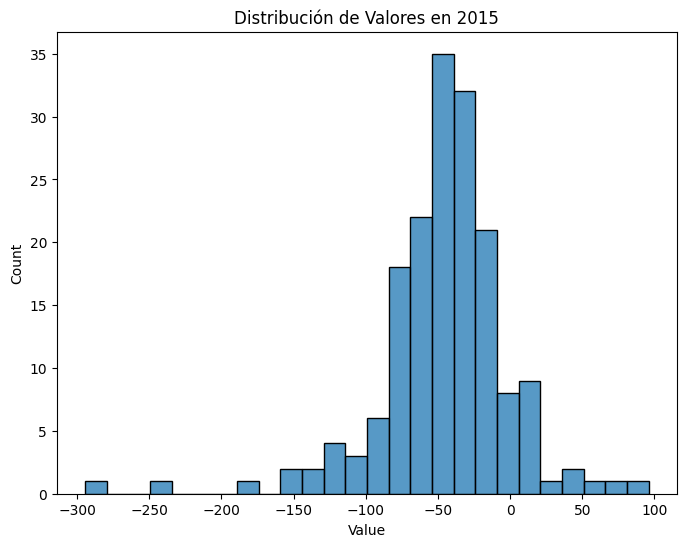

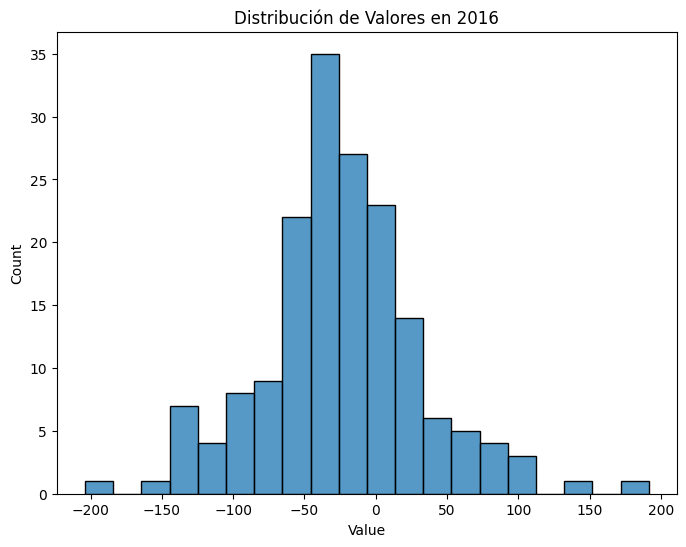

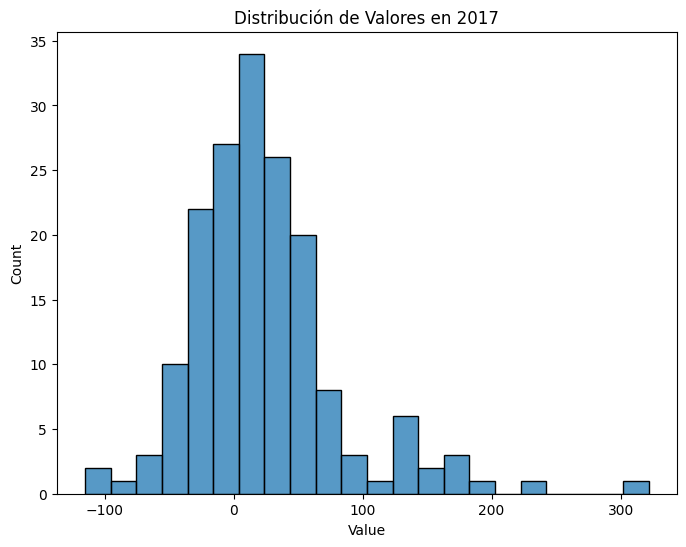

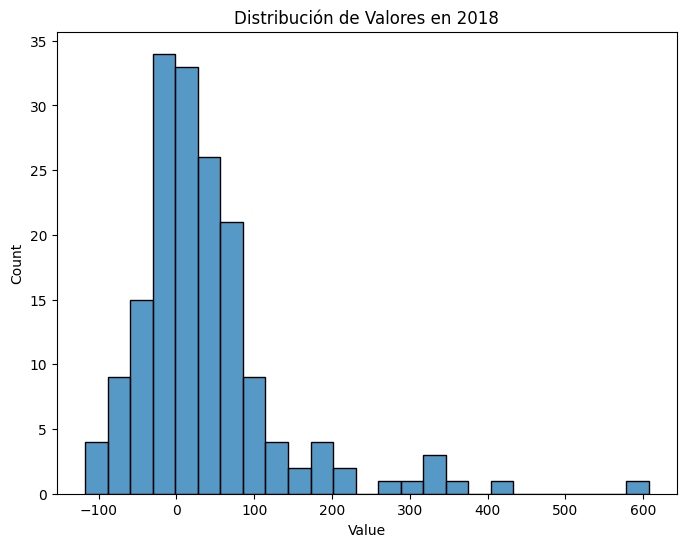

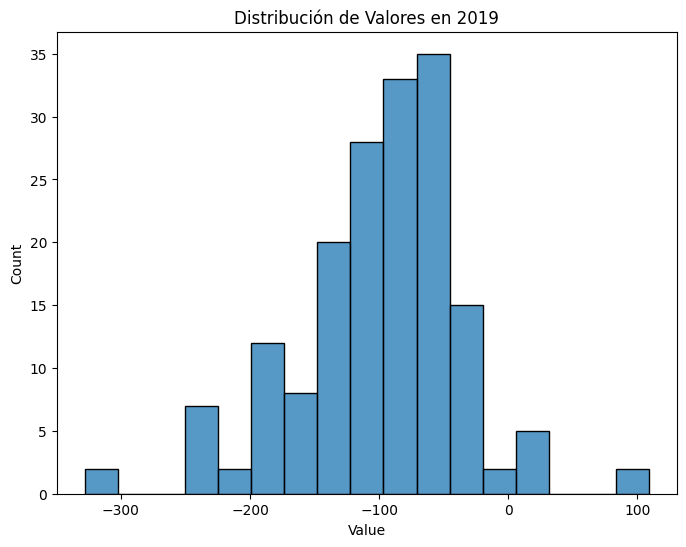

In [73]:
# Visualización de datos
df_skill_mig_ar_melted['Year'] = df_skill_mig_ar_melted['Year'].astype(int)
for year in range(2015, 2020):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_skill_mig_ar_melted[df_skill_mig_ar_melted['Year'] == year], x='Value')
    plt.title(f'Distribución de Valores en {year}')
    plt.show()

In [74]:
data_grouped = df_skill_mig_ar_melted.groupby('Year')['Value'].describe()
data_grouped

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,171.0,-45.881696,46.727397,-294.48,-65.895,-43.17,-23.700,96.06
2016,171.0,-23.816082,56.897598,-203.84,-51.370,-26.92,5.430,191.54
2017,171.0,23.737778,58.964087,-115.12,-9.120,14.54,47.910,321.82
2018,171.0,38.850058,98.041200,-117.29,-17.380,17.92,63.105,607.12
2019,171.0,-99.243509,64.196213,-327.67,-130.140,-91.25,-58.885,108.72


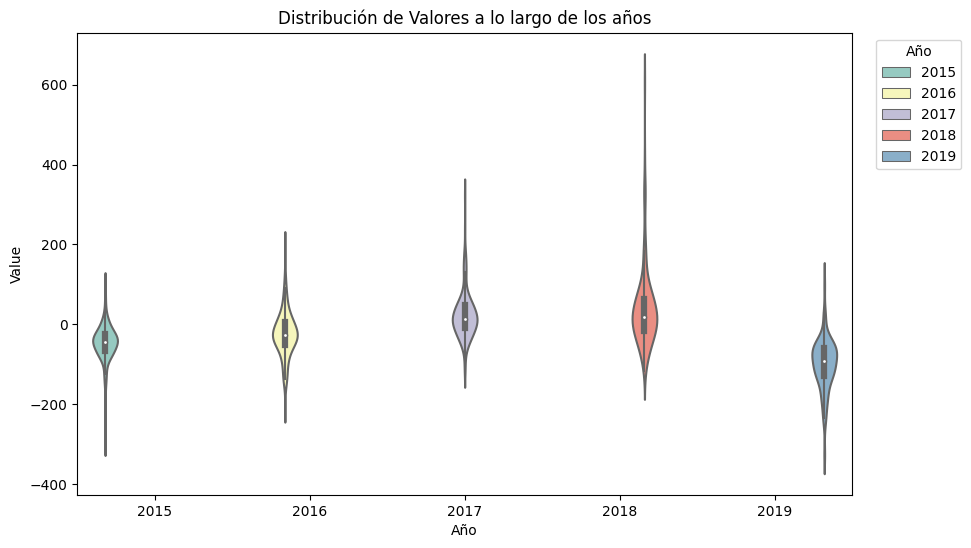

In [75]:
# Crear un gráfico de violín para mostrar la distribución de 'Value' a lo largo de los años
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_skill_mig_ar_melted, x='Year', y='Value', hue='Year', palette="Set3")
plt.title('Distribución de Valores a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Value')
plt.legend(title='Año', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

2015:
La media (mean) es aproximadamente -45.88. Esto sugiere que, en promedio, los valores de "Value" en 2015 tienden a ser negativos.
La desviación estándar (std) es aproximadamente 46.73. La alta desviación estándar indica una variabilidad significativa en los valores.
El valor mínimo (min) es -294.48 y el valor máximo (max) es 96.06. Esto muestra que los valores oscilan en un rango amplio.
2016:
La media es aproximadamente -23.82. Aunque la media sigue siendo negativa, es menos negativa que en 2015.
La desviación estándar es alta (aproximadamente 56.90), lo que indica una variabilidad significativa en los valores.
El valor mínimo es -203.84 y el valor máximo es 191.54. Los valores varían en un rango considerable.
2017:
La media es aproximadamente 23.74, lo que sugiere un cambio hacia valores más positivos en comparación con los años anteriores.
La desviación estándar sigue siendo alta (aproximadamente 58.96).
El valor mínimo es -115.12 y el valor máximo es 321.82. Los valores se distribuyen en un rango amplio.
2018:
La media es aproximadamente 38.85, lo que indica un aumento en los valores positivos en comparación con 2016 y 2017.
La desviación estándar es alta (aproximadamente 98.04), lo que sugiere una mayor variabilidad.
El valor mínimo es -117.29 y el valor máximo es 607.12. Los valores son muy variables y tienen un rango amplio.
2019:
La media es aproximadamente -99.24, lo que muestra un cambio hacia valores negativos en comparación con 2018.
La desviación estándar es aproximadamente 64.20, lo que indica una variabilidad similar a la de 2017.
El valor mínimo es -327.67 y el valor máximo es 108.72. Los valores tienen un rango amplio y varían en gran medida.

El valor mínimo se da en 2019 registrando -327.67 y el valor máximo en 2018 con un registro de 98.041200

En resumen, los valores muestran una tendencia desde valores negativos en 2015, pasando por valores más cercanos a cero en 2016, hacia valores positivos en 2017 y 2018, y nuevamente hacia valores negativos en 2019. La alta desviación estándar en todos los años indica que los valores son muy variables y pueden estar sujetos a cambios significativos de un año a otro. Esta información es esencial para comprender cómo se distribuyen los valores a lo largo del tiempo y cómo han evolucionado.

Con base en los datos y las estadísticas proporcionadas, podemos concluir que a lo largo de los años 2015 a 2019, ha habido variaciones significativas en las migraciones de habilidades en Argentina. Inicialmente, se observa una tendencia a la pérdida de habilidades en 2015, seguida de una estabilización cerca de cero en 2016, y un cambio hacia ganancias netas de habilidades en los años posteriores. Los datos reflejan una alta variabilidad en los valores a lo largo de los años, con valores mínimos y máximos que muestran la amplitud de estas fluctuaciones. Estos patrones pueden indicar cambios en la dinámica laboral y la adquisición o pérdida de habilidades en el país.

### Variable Skill_group_category

In [84]:
# Crear un DataFrame para sumar los valores por categoría de habilidades y año
category_sums_by_year = df_skill_mig_ar_melted.groupby(['Year', 'skill_group_category'])['Value'].sum().unstack()

# Mostrar la tabla
category_sums_by_year

skill_group_category,Business Skills,Disruptive Tech Skills,Soft Skills,Specialized Industry Skills,Tech Skills
Year,,,,,
2015,-2416.93,-439.05,-697.14,-3165.12,-1127.53
2016,-646.51,-225.22,-213.93,-2057.71,-929.18
2017,1004.40,214.02,433.53,2361.33,45.88
2018,1252.79,290.40,639.92,4257.99,202.26
2019,-4044.08,-1025.57,-1099.82,-8481.26,-2319.91


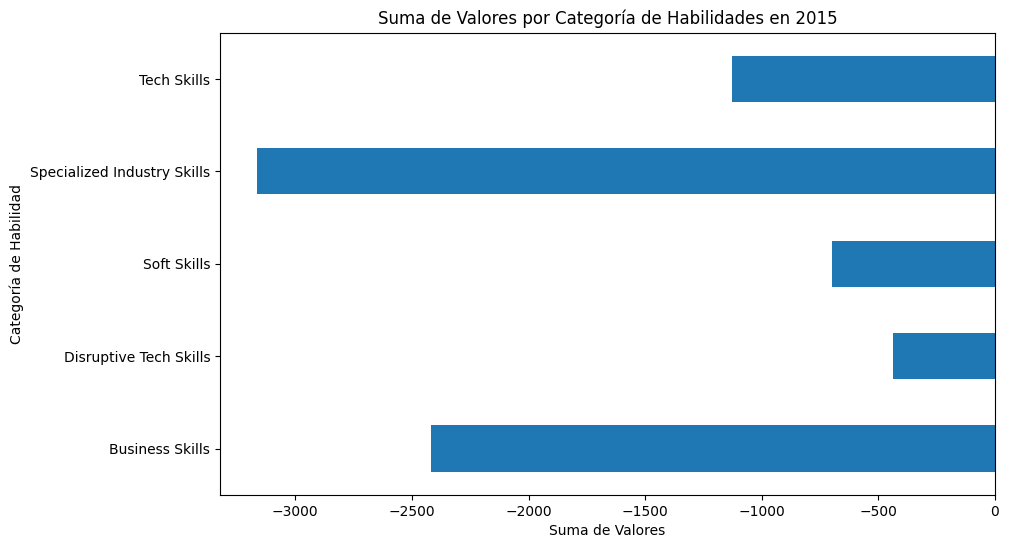

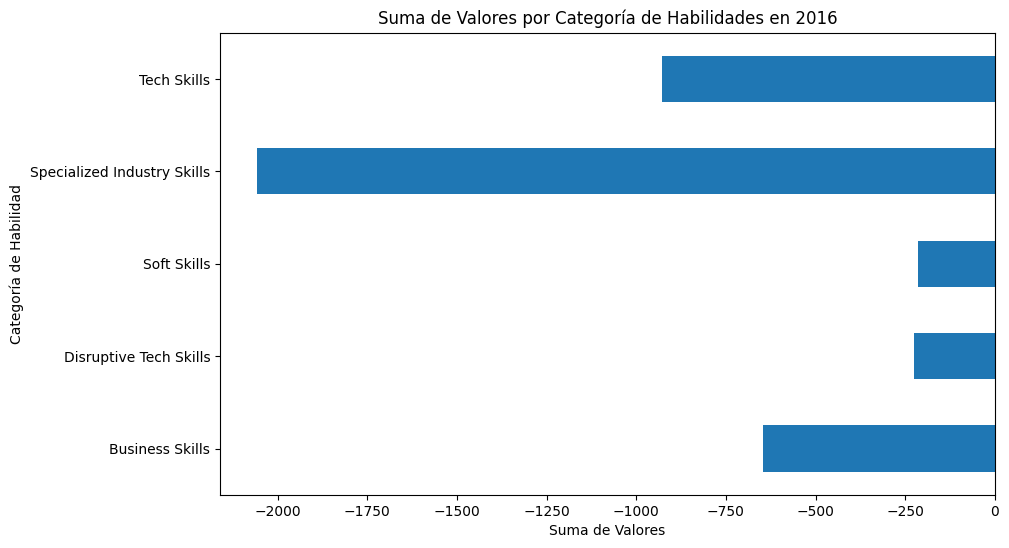

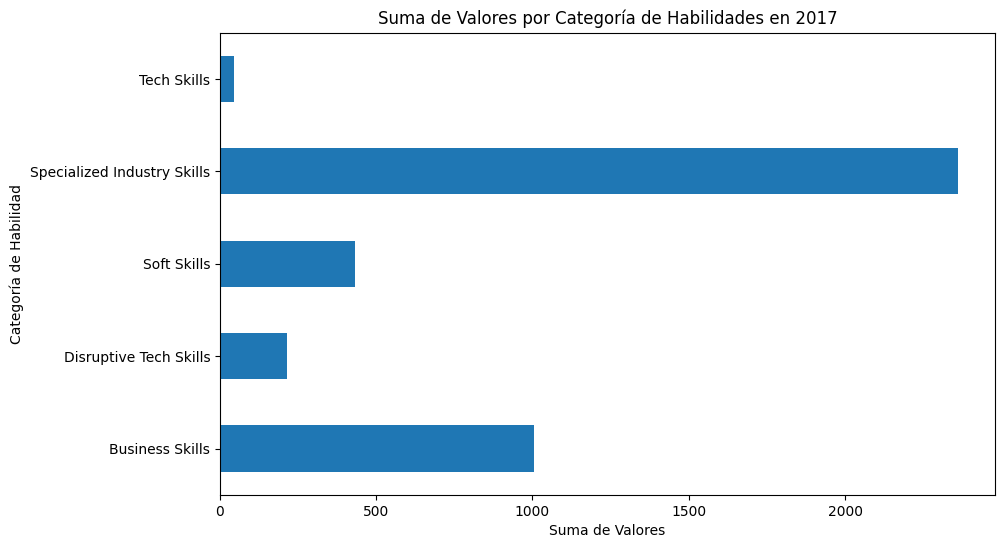

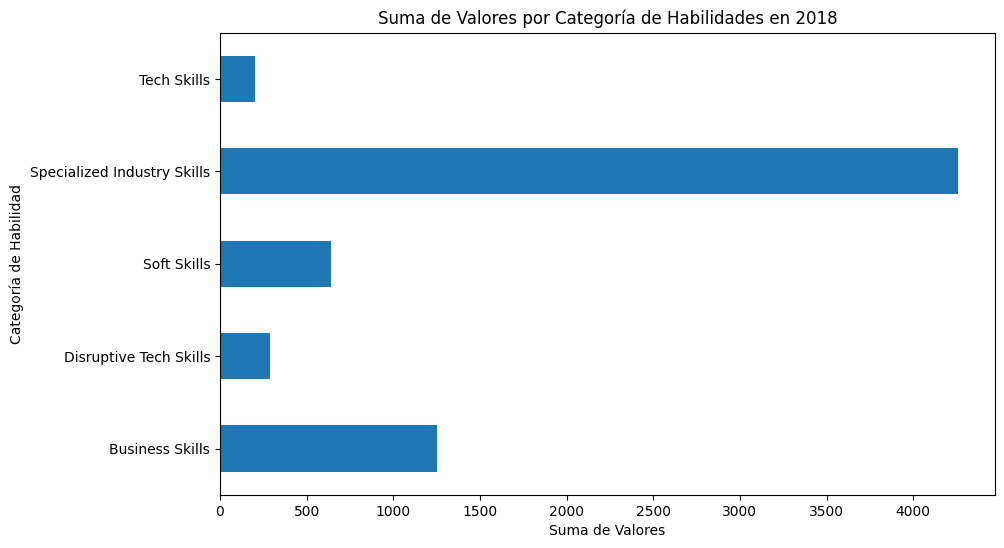

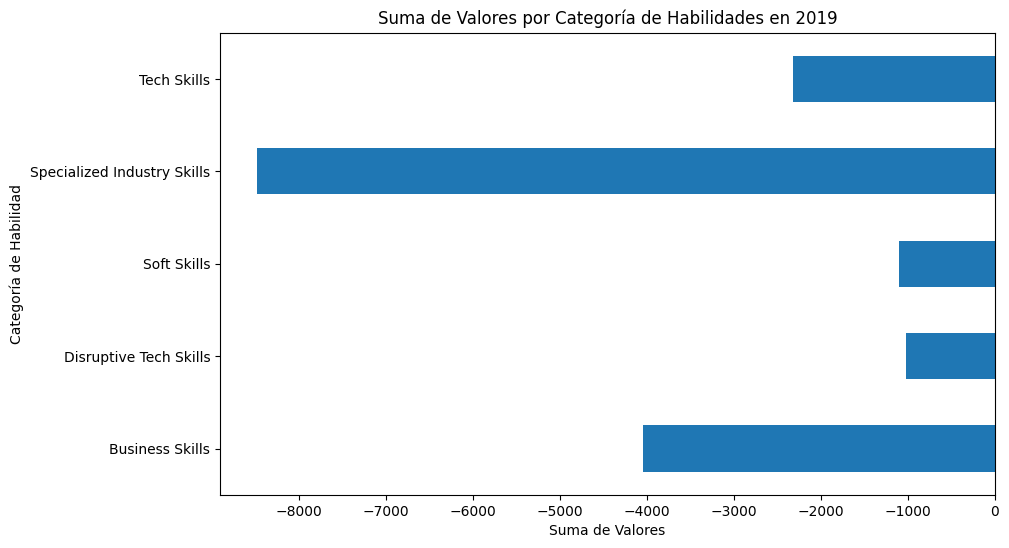

In [77]:
# Obtener una lista de años únicos en tus datos
years = df_skill_mig_ar_melted['Year'].unique()

# Crear un gráfico separado para cada año
for year in years:
    # Filtrar los datos para el año actual
    data_for_year = df_skill_mig_ar_melted[df_skill_mig_ar_melted['Year'] == year]
    
    # Crear un DataFrame para sumar los valores por categoría de habilidades
    category_sums = data_for_year.groupby('skill_group_category')['Value'].sum()
    
    # Crear un gráfico de barras horizontales para el año actual
    plt.figure(figsize=(10, 6))
    category_sums.plot(kind='barh')
    
    # Configurar el gráfico
    plt.title(f'Suma de Valores por Categoría de Habilidades en {year}')
    plt.xlabel('Suma de Valores')
    plt.ylabel('Categoría de Habilidad')
    
    # Mostrar el gráfico
    plt.show()

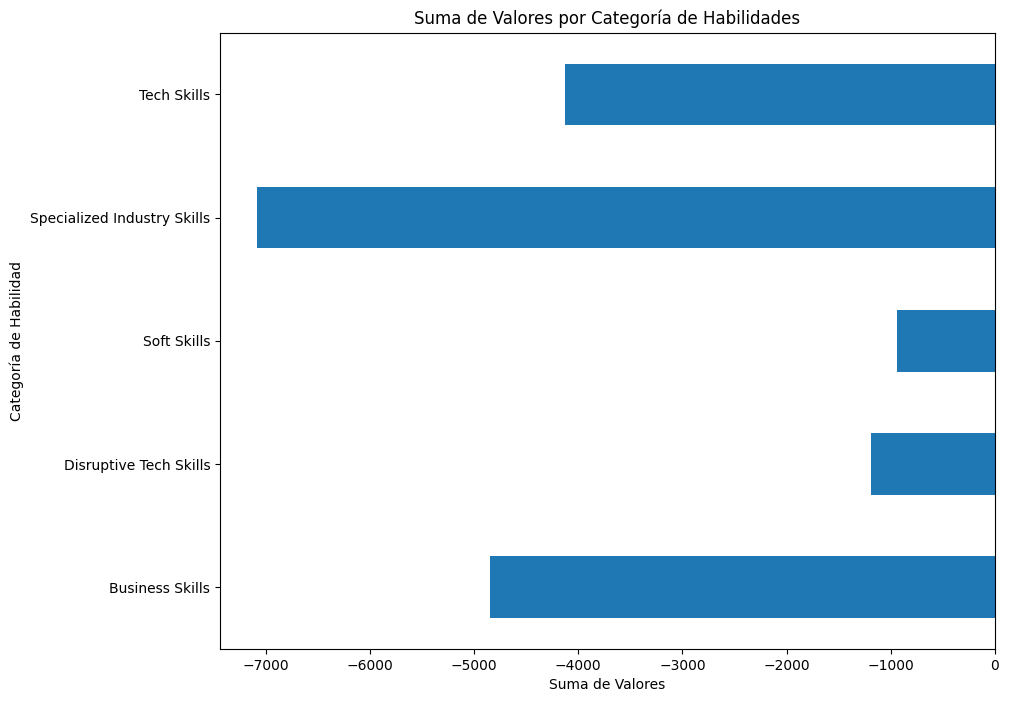

In [78]:
# Crear un DataFrame para sumar los valores por categoría de habilidades
category_sums = df_skill_mig_ar_melted.groupby('skill_group_category')['Value'].sum()

# Crear un gráfico de barras horizontales
category_sums.plot(kind='barh', figsize=(10, 8))

# Configurar el gráfico
plt.title('Suma de Valores por Categoría de Habilidades')
plt.xlabel('Suma de Valores')
plt.ylabel('Categoría de Habilidad')

# Mostrar el gráfico
plt.show()

Basándonos en los datos, observamos los resultados para cada año y categoría de habilidades:

Año 2015:

La categoría "Business Skills" tuvo una pérdida significativa de aproximadamente -2416.93.
"Specialized Industry Skills" también mostró una pérdida sustancial de -3165.12.
"Tech Skills" registró una pérdida de -1127.53.
Otras categorías, como "Disruptive Tech Skills," "Soft Skills," y "Specialized Industry Skills," también experimentaron pérdidas.
Año 2016:

La mayoría de las categorías, incluidas "Business Skills," "Specialized Industry Skills," y "Tech Skills," experimentaron pérdidas.
La categoría "Disruptive Tech Skills" tuvo la pérdida más baja de todas las categorías, con aproximadamente -225.22.
Año 2017:

"Business Skills" mostró una recuperación con un aumento de 1004.40.
"Specialized Industry Skills" también tuvo un fuerte crecimiento de 2361.33.
Otras categorías, como "Disruptive Tech Skills," "Soft Skills," y "Tech Skills," también experimentaron aumentos.
Año 2018:

La tendencia positiva continuó para "Business Skills," con un aumento de 1252.79.
"Specialized Industry Skills" y "Tech Skills" también experimentaron aumentos.
Otras categorías mostraron variaciones positivas o estabilidad.
Año 2019:

"Business Skills" experimentó una pérdida significativa de -4044.08.
"Specialized Industry Skills" registró una pérdida notable de -8481.26.
Otras categorías, como "Disruptive Tech Skills," "Soft Skills," y "Tech Skills," también mostraron pérdidas.
Conclusión:

Los datos reflejan una variabilidad significativa en la incidencia de las categorías de habilidades a lo largo de los años.
Se observan cambios notables en la demanda de habilidades, con aumentos y pérdidas significativas en diferentes categorías en diferentes años.
Las categorías "Business Skills" y "Specialized Industry Skills" parecen ser las más influyentes, con tendencias cambiantes a lo largo de los años.
Estos datos pueden ser indicativos de cambios en la economía, la industria laboral y las necesidades de habilidades en Argentina durante ese período.


In [83]:
import pandas as pd

# Supongamos que tu DataFrame se llama 'df'.
# Reemplaza 'df' con el nombre real de tu DataFrame.

# Agrupa los datos por año y suma los valores para cada año
grouped = df_skill_mig_ar_melted.groupby('Year')['Value'].sum().reset_index()

# Calcula el porcentaje de variación entre un año y otro
grouped['Variacion'] = grouped['Value'].pct_change() * 100

# Renombra las columnas
grouped = grouped.rename(columns={'Year': 'Año', 'Value': 'Total', 'Variacion': '% de Variación'})

# Muestra la tabla resultante
print(grouped)





    Año     Total  % de Variación
0  2015  -7845.77             NaN
1  2016  -4072.55      -48.092412
2  2017   4059.16     -199.671213
3  2018   6643.36       63.663418
4  2019 -16970.64     -355.452663
